# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("data.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [7]:
fifa.describe()


,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
Age                18207 non-null int64
Overall            18207 non-null int64
Potential          18207 non-null int64
Crossing           18159 non-null float64
Finishing          18159 non-null float64
HeadingAccuracy    18159 non-null float64
ShortPassing       18159 non-null float64
Volleys            18159 non-null float64
Dribbling          18159 non-null float64
Curve              18159 non-null float64
FKAccuracy         18159 non-null float64
LongPassing        18159 non-null float64
BallControl        18159 non-null float64
Acceleration       18159 non-null float64
SprintSpeed        18159 non-null float64
Agility            18159 non-null float64
Reactions          18159 non-null float64
Balance            18159 non-null float64
ShotPower          18159 non-null float64
Jumping            18159 non-null float64
Stamina            18159 non-null float64
Strength       

Temos alguns valores faltantes nas colunas

In [9]:

faltantes = pd.DataFrame({'colunas':fifa.columns, 
                      'tipo':fifa.dtypes,
                      'Qtde valores NaN':fifa.isna().sum(),
                      '% valores NaN':fifa.isna().sum()/fifa.shape[0],
                      'valores únicos por feature':fifa.nunique()})
faltantes = faltantes.reset_index()
faltantes

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
0,Age,Age,int64,0,0.000000,29
1,Overall,Overall,int64,0,0.000000,48
2,Potential,Potential,int64,0,0.000000,47
3,Crossing,Crossing,float64,48,0.002636,89
4,Finishing,Finishing,float64,48,0.002636,93
5,HeadingAccuracy,HeadingAccuracy,float64,48,0.002636,91
6,ShortPassing,ShortPassing,float64,48,0.002636,85
7,Volleys,Volleys,float64,48,0.002636,87
8,Dribbling,Dribbling,float64,48,0.002636,94
9,Curve,Curve,float64,48,0.002636,89


Como a quantidade de valores faltantes é mínima podemos excluí-los


In [10]:
fifa_drop = fifa.dropna()

In [11]:
fifa_drop.shape


(18159, 37)

In [12]:
pca = PCA(n_components=2) #Instanciando o PCA
projected = pca.fit_transform(fifa_drop)

print(f"Original shape: {fifa.shape}, projected shape: {projected.shape}")


Original shape: (18207, 37), projected shape: (18159, 2)


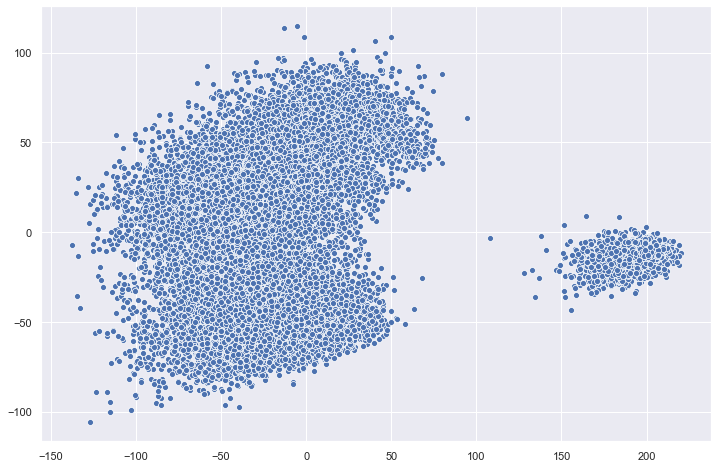

In [13]:
sns.scatterplot(projected[:, 0], projected[:, 1]);


In [14]:
pca = PCA().fit(fifa_drop)

evr = pca.explained_variance_ratio_

evr

array([5.65280555e-01, 1.81025219e-01, 5.95283391e-02, 4.34269284e-02,
       2.63532326e-02, 1.20707695e-02, 1.03550495e-02, 8.52951131e-03,
       7.87862979e-03, 7.20416677e-03, 7.18180297e-03, 6.32893542e-03,
       5.19242286e-03, 4.90798293e-03, 4.74209042e-03, 4.62772008e-03,
       4.25173246e-03, 3.86288432e-03, 3.76588448e-03, 3.75092615e-03,
       3.47815213e-03, 3.26730709e-03, 3.03137944e-03, 2.97415845e-03,
       2.56797543e-03, 2.30353342e-03, 2.14815132e-03, 1.56135904e-03,
       1.55351696e-03, 1.08664227e-03, 1.06824189e-03, 1.05891525e-03,
       9.58143746e-04, 8.89209394e-04, 8.59732430e-04, 7.34611045e-04,
       1.94187517e-04])

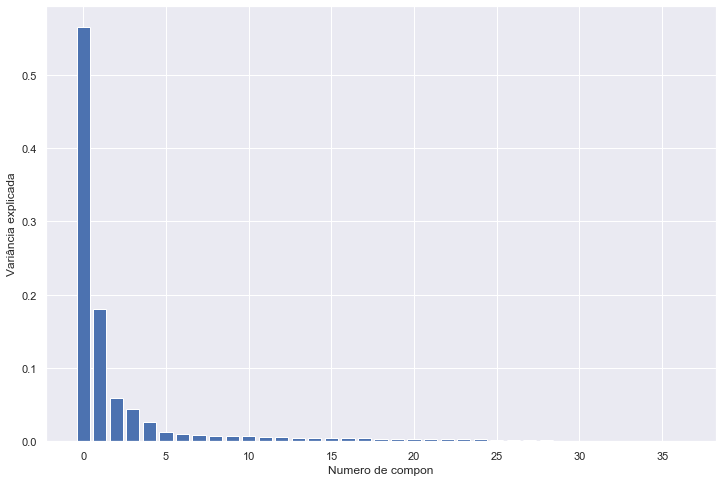

In [15]:
g = plt.bar(range(len(evr)),evr)
plt.xlabel('Numero de compon')
plt.ylabel('Variância explicada');

O dataset possui 37 variáveis, pelo gráfico de barras percebemos que as componentes principais 1 e 2 são capazes de explicar cerca de 80% do dataset.

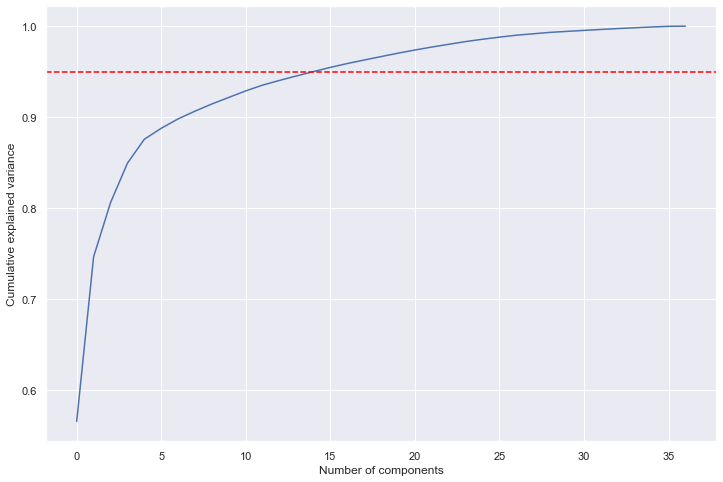

In [16]:
g = sns.lineplot(np.arange(len(evr)), np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

Para chegar em um valor exato:

In [17]:
cumulative_variance_ratio = np.cumsum(evr)
component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.

component_number

15

Portanto cerca de 15 features são responsáveis por explicar 95% do dataset



## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [18]:
def q1():
    pca = PCA()
    # Retorne aqui o resultado da questão 1.
    pca.fit_transform(fifa_drop) 
    evr = pca.explained_variance_ratio_
    return float(round(evr[0],3))

In [19]:
q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [20]:
def q2():
    pca = PCA().fit(fifa_drop)
    # Retorne aqui o resultado da questão 1.
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.
    # Retorne aqui o resultado da questão 2.
    return int(component_number)

In [21]:
q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

Usar dados centralizados implica que $\mu x = 0$ e a matriz de de covariância é dada por $C = \sum_{i=0}^N x_ix_i^T$.



In [22]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [23]:
pca_2componentes = PCA(n_components=2)
pca_2componentes.fit(fifa_drop) 
np.dot(pca_2componentes.components_,x)

array([186.55588031,  -6.59243177])

In [24]:
def q3():
    pca_2componentes = PCA(n_components=2)
    pca_2componentes.fit(fifa_drop) 
    pc = np.dot(pca_2componentes.components_,x)
    return (round(pc[0],3),round(pc[1],3))
    # Retorne aqui o resultado da questão 3.

In [25]:
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

Uma feature interessante nesse dataset para ser considerada como target é a Overall que incorpora todos os atributos com ênfase em cada posição. Como pode ser verificado no link abaixo:

http://comufifa.blogspot.com/2012/05/fifa-entendendo-os-atributos.html

Informação encontrada na comunidade codenation

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

RFE retorna uma lista de boolean

In [27]:
X = fifa_drop.drop(columns='Overall')
y = fifa_drop['Overall']

lr = LinearRegression()
rfe = RFE(lr, 5)
    
var = rfe.fit(X,y)
X.columns[var.support_]

/Users/lauradamacenodealmeida/codenation/data-science-3/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes'], dtype='object')

In [30]:
def q4():
    X = fifa_drop.drop(columns='Overall')
    y = fifa_drop['Overall']

    lr = LinearRegression()
    rfe = RFE(lr, 5)
    
    var = rfe.fit(X,y)
    return list(X.columns[var.support_])
    # Retorne aqui o resultado da questão 4.


In [31]:
q4()

/Users/lauradamacenodealmeida/codenation/data-science-3/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']